In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

In [2]:
from src.image_handler import *
from src.preprocessing import *

## Preprocessing

#### Raw image

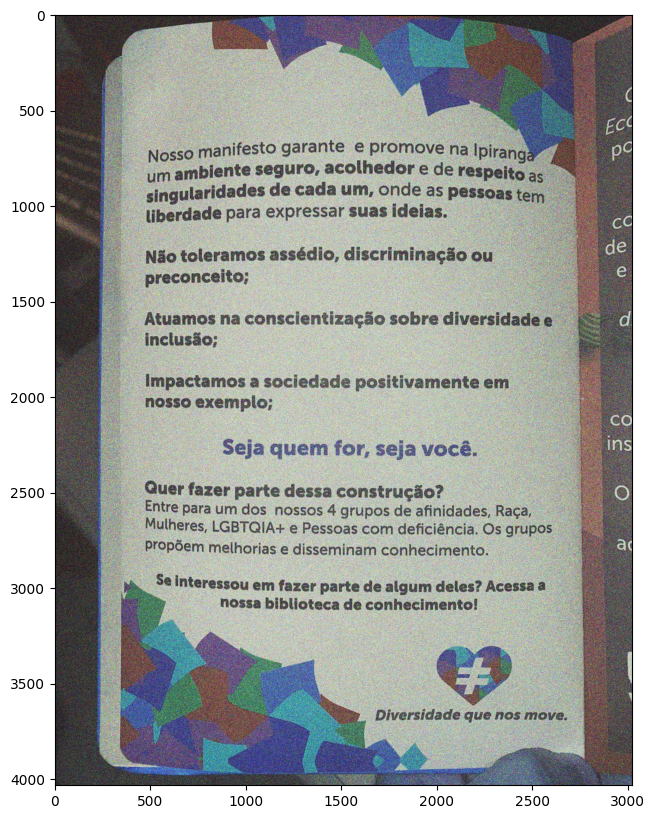

In [3]:
raw = read_image()
show(raw)

### Processing

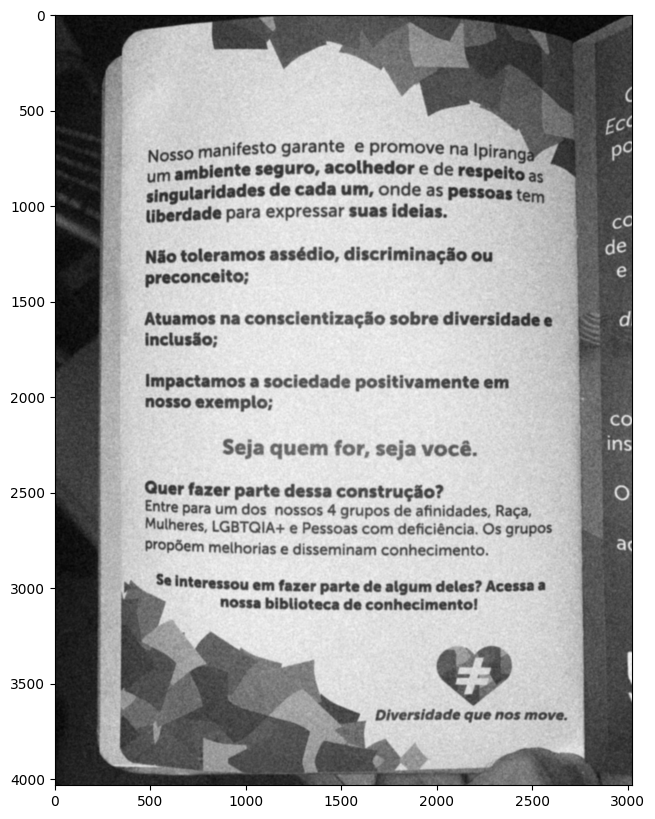

In [4]:
grey = get_greyscale(raw)
gauss = gaussian(grey)

show(gauss)

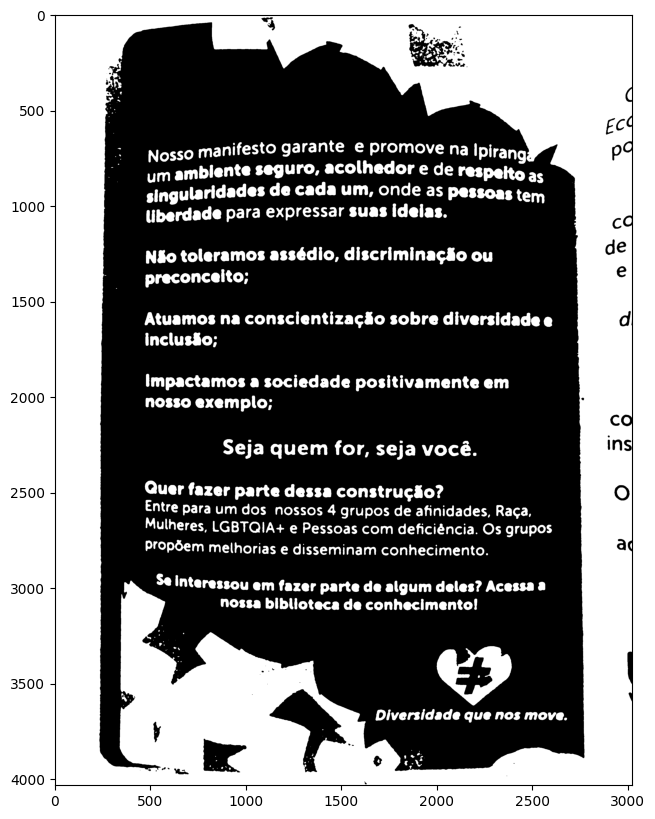

In [5]:
thres = thresholding(gauss)

show(thres)

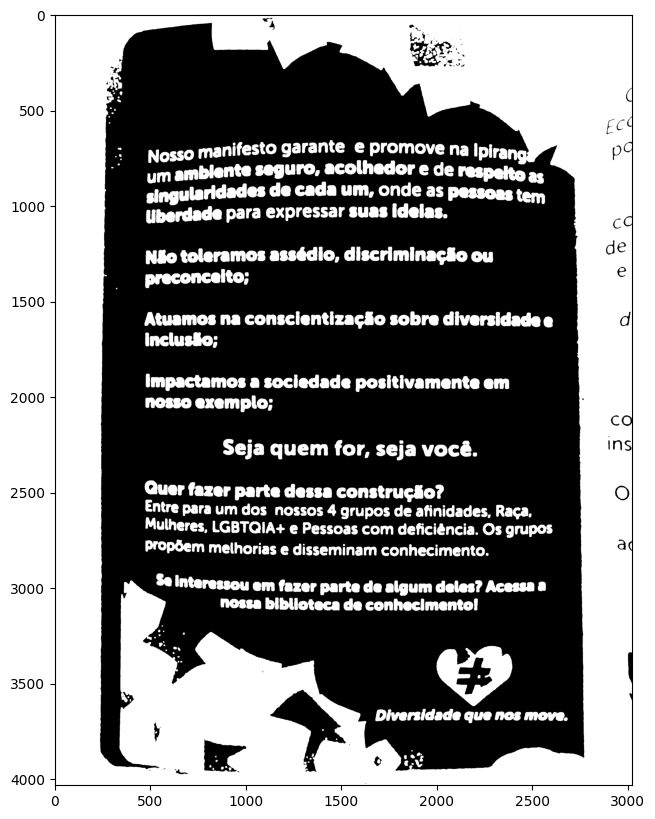

In [6]:
#processed = erode(thres, iterations=2)
processed = erode(thres, iterations=2)
processed = dilate(processed, iterations=2)

processed = erode(thres, iterations=2)
processed = dilate(processed, iterations=3)

show(processed)

## Character Segmentation

In [7]:
contours = get_contours(processed)
contourned_img = draw_contours(raw, contours[0])
#show(contourned_img)

## OCRing

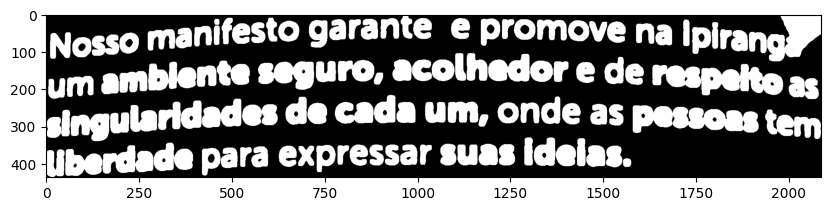

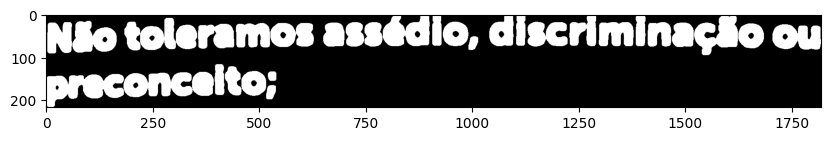

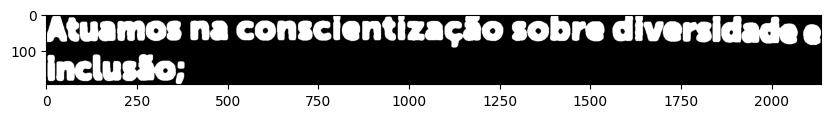

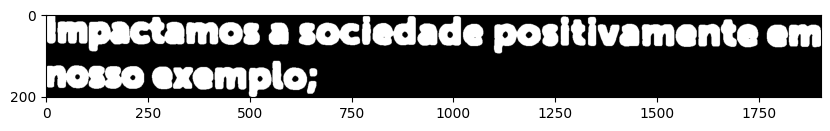

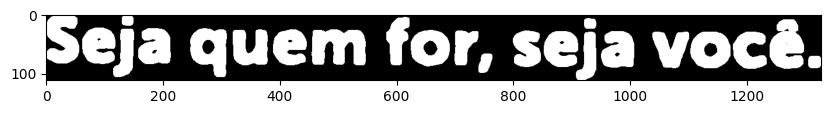

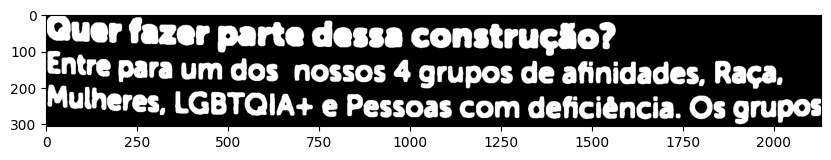

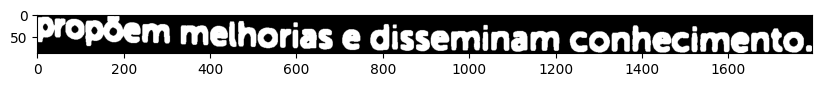

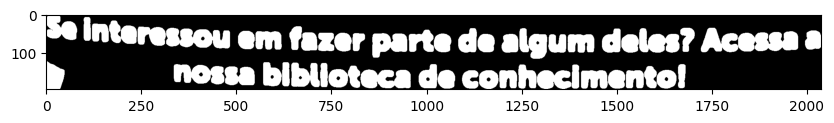

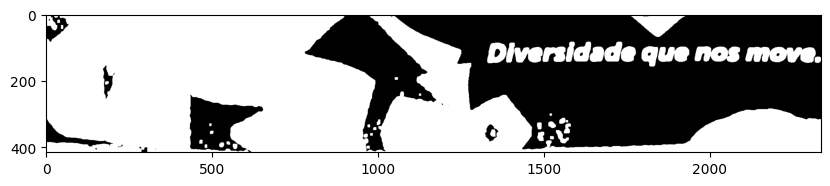

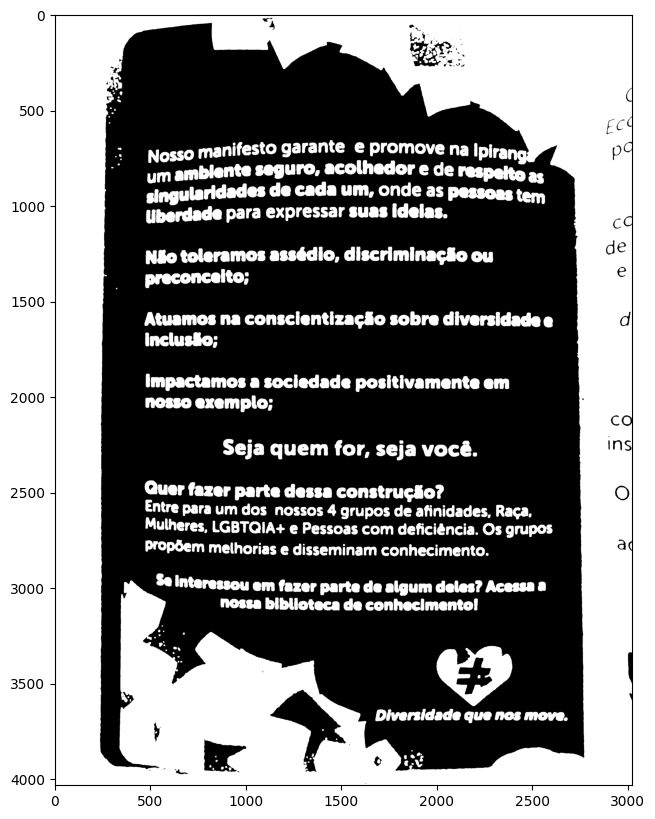

In [8]:
d = get_data(processed)
type(d)
for i in range(len(d['text'])):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    crop_img = processed[y:y+h, x:x+w]
    if d['level'][i] == 2:
        show(crop_img)
        print(d['text'][i])

In [10]:
for contour in contours[0]:
    # Obtém coordenadas do retângulo delimitador do caractere
    x,y,w,h = cv2.boundingRect(contour)
    # Recorta o caractere da imagem
    roi = raw[y:y+h, x:x+w]
    # Aplica OCR com o Tesseract
    text = pytesseract.image_to_string(roi, lang='por')
    if (text != '') and (text != ' ') and (text):0,,
        print(text)

## Postprocessing